<h1 align="center">Volume 4: Spectral 2.</h1>

    NAME
    Section #
    DATE

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

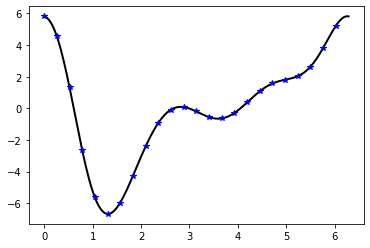

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

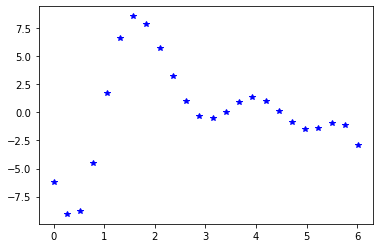

In [4]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Do second derivative
f_hat2 = fft(fp)
fp_hat2 = ((1j*k)*f_hat2)
fp2 = np.real(ifft(fp_hat2))

plt.plot(x1,fp2/2 - fp,'*b')
plt.show()

# Problem 2 - setup

In [8]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

(150, 100) (150, 100) (150, 100)


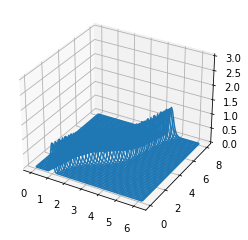

In [19]:
t_steps = 150 # Time steps
x_steps = 100 # x steps

# ut + c(x) * ux
c = lambda x: .2 + np.sin(x-1)**2
x1 = 2*np.pi / x_steps * np.arange(x_steps)
u_0 = np.exp(-100 * (x1-1)**2)


a = 0
b = 8
y0, h = np.linspace(0, 8, t_steps, retstep = True)


X, Y, h, n = initialize_all(a, b, u_0, h)

k = np.concatenate(( np.arange(0,x_steps/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-x_steps/2+1,0) ))

f = lambda x, u: -1 * c(x1) * np.real(ifft(1j * k * fft(u)))

sol = RK4(f,X,Y,h,n)
X,Y = np.meshgrid(x1, np.linspace(a, b, t_steps))
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.show()
